In [15]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import glob

In [16]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cmocean
import seaborn as sns

In [17]:
sns.set(font_scale=1)
sns.set_style("ticks")

In [18]:
ds = xr.open_mfdataset('/Users/chiaraciscato/Desktop/geomar/FOCI data/data_transfer/ph_base/*.nc')

In [19]:
lats = ds.variables['nav_lat'][:]
lons = ds.variables['nav_lon'][:]
time = ds.variables['time_counter'][:]
ph = ds.variables['ph'][:]
co2flux = ds.variables['co2flux_cpl'][:]

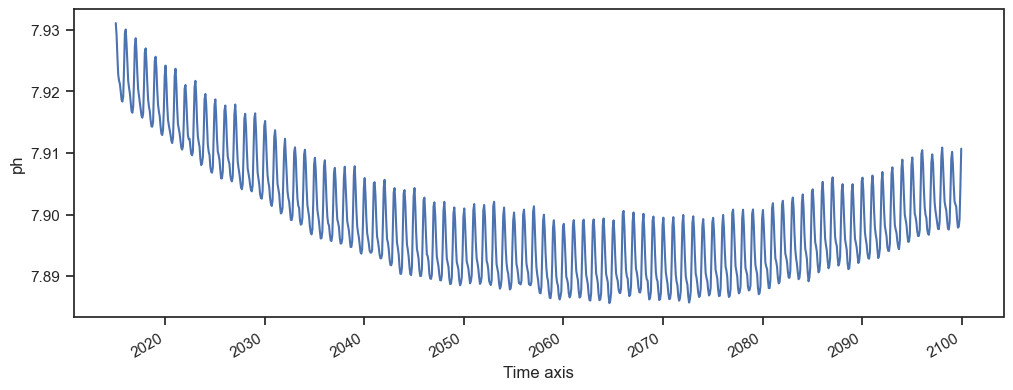

In [20]:
ds.ph.mean(dim=('y', 'x')).plot(figsize= (12, 4)) # global mean for pH without OAE

In [21]:
df = ds.sel(time_counter=slice('2090', '2100'))

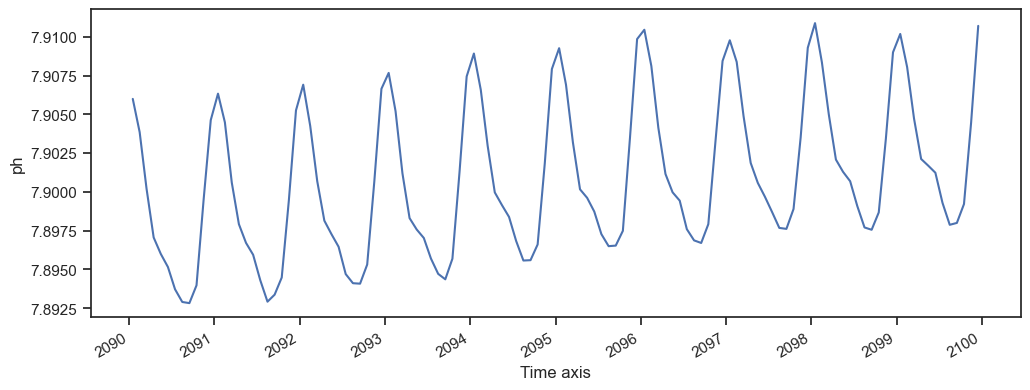

In [25]:
df.ph.mean(dim=('y', 'x')).plot(figsize= (12, 4)) # global from 2090 to 2100

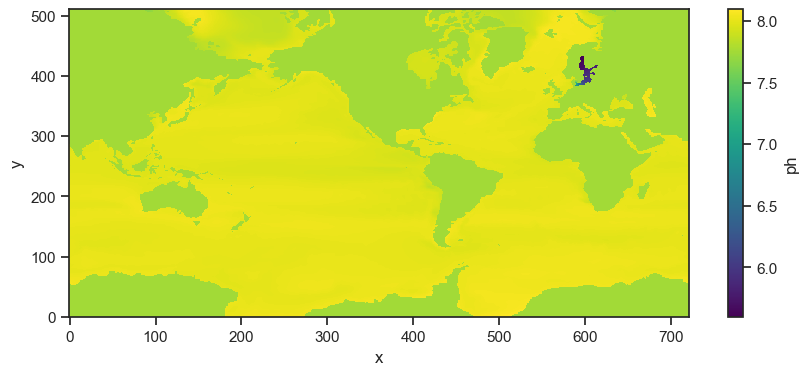

In [26]:
ds.ph.mean(dim=('time_counter')).plot(figsize = (10, 4))

In [27]:
sliced_data = ds.where((-25 < ds.nav_lon) & (ds.nav_lon < 10) & (35 < ds.nav_lat) & (ds.nav_lat < 70), drop=True)

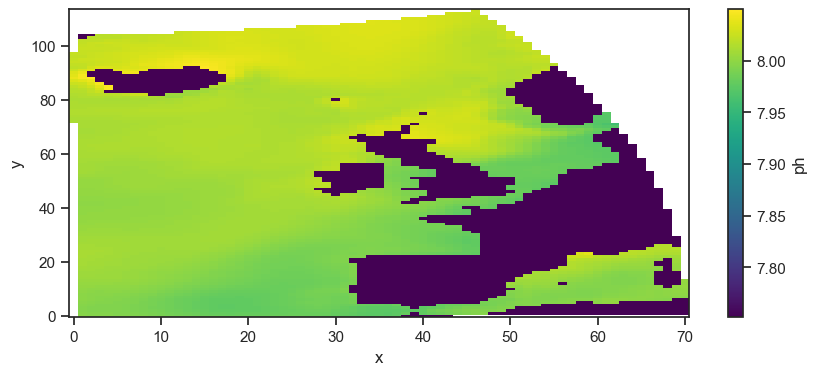

In [28]:
sliced_data.ph.mean(dim=('time_counter')).plot(figsize = (10, 4))

Text(0.5, 1.03, 'Global Seasonal Average of pH from 2015 to 2100')

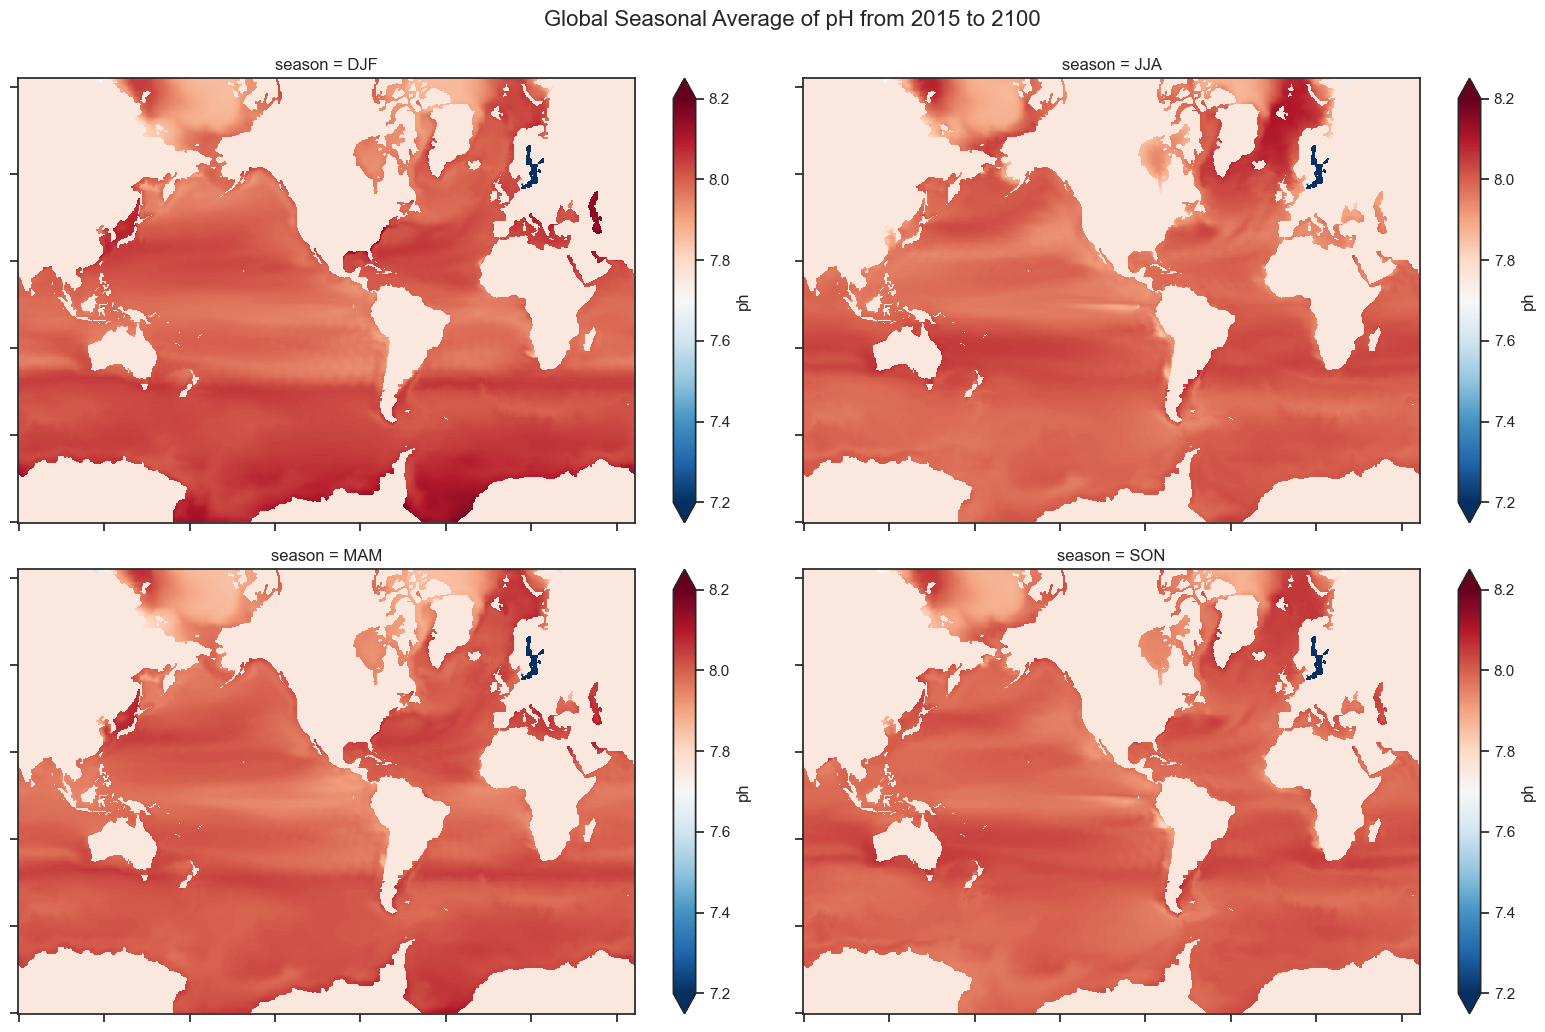

In [70]:
ds_season = ds.ph.groupby('time_counter.season').mean('time_counter')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
i = 0
for j, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        i += 1
        j = 0
        
    elif season =='SON':
        j = 1
        
    ds_season.sel(season=season).plot.pcolormesh(
        ax=axes[j, i], vmin=7.2, vmax=8.2, cmap='RdBu_r',
        add_colorbar=True, extend='both')
    
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')
    
for ax in axes.flat:
    ax.set(xlabel='', ylabel='') 

plt.tight_layout()
fig.suptitle('Global Seasonal Average of pH from 2015 to 2100', fontsize=15, y=1.06)

Text(0.5, 1.06, 'EU Seasonal Average of pH from 2015 to 2100')

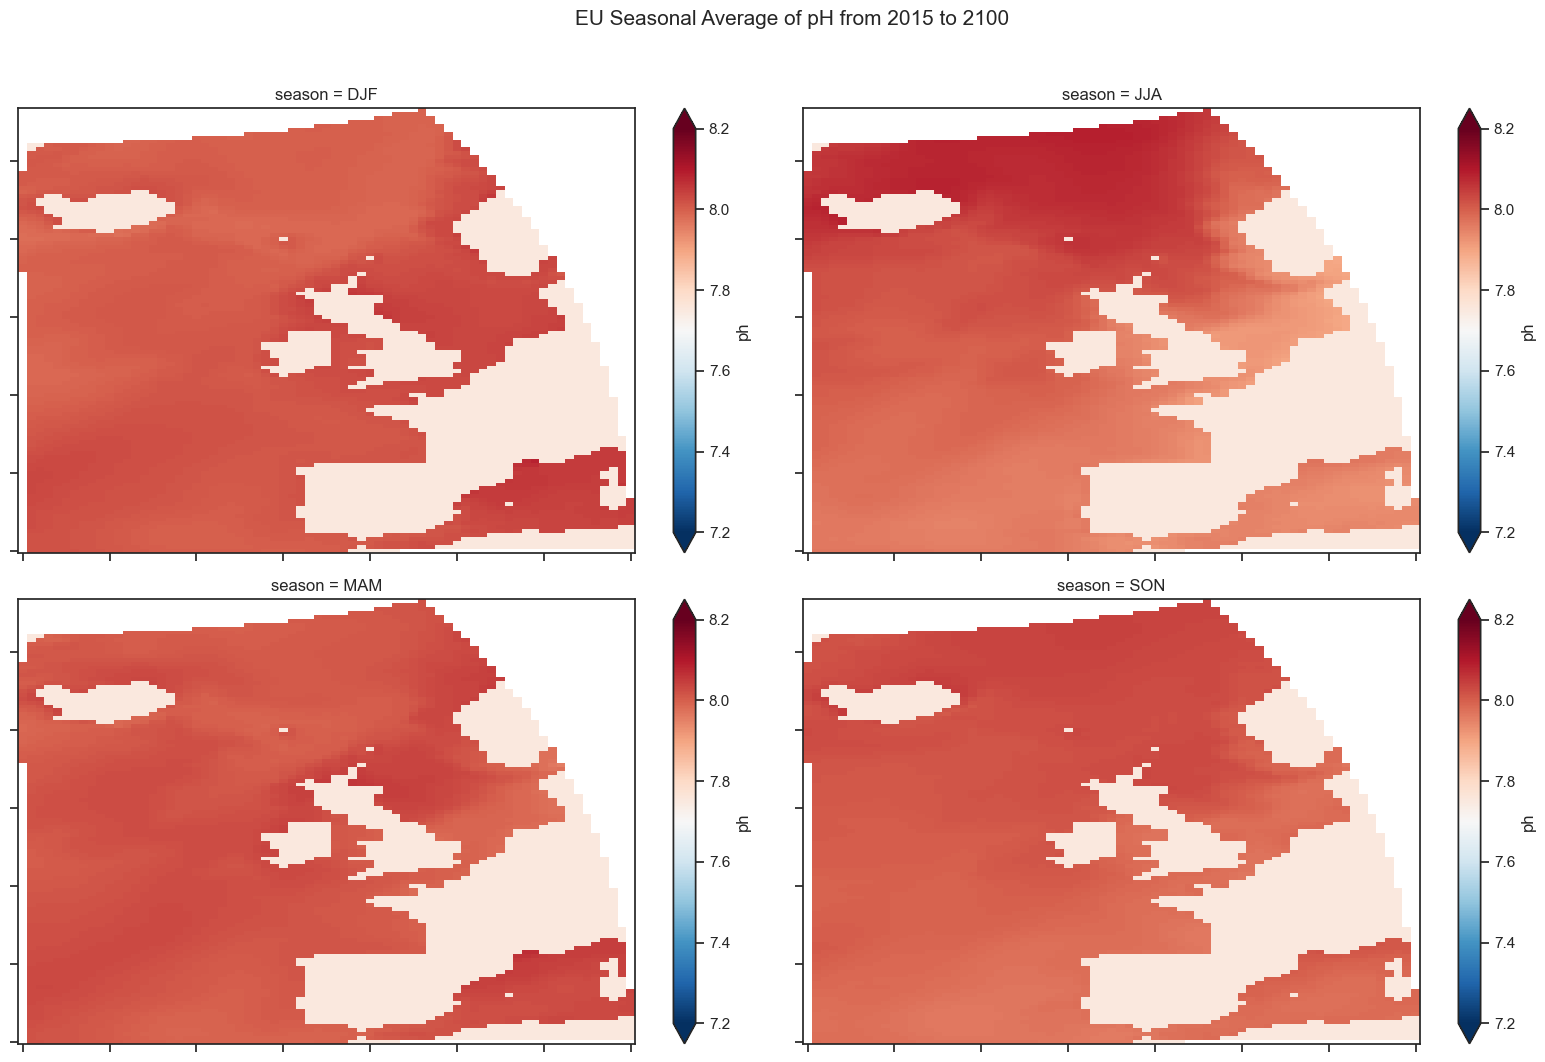

In [71]:
ds_season = sliced_data.ph.groupby('time_counter.season').mean('time_counter')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
i = 0
for j, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        i += 1
        j = 0
        
    elif season =='SON':
        j = 1
        
    ds_season.sel(season=season).plot.pcolormesh(
        ax=axes[j, i], vmin=7.2, vmax=8.2, cmap='RdBu_r',
        add_colorbar=True, extend='both')
    
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')
    
for ax in axes.flat:
    ax.set(xlabel='', ylabel='') 

plt.tight_layout()
fig.suptitle('EU Seasonal Average of pH from 2015 to 2100', fontsize=15, y=1.06)

In [33]:
start_date = "2090-01-01"
end_date = "2100-01-01"

ph_flux = sliced_data["ph"].sel(time_counter=slice(start_date, end_date))

In [34]:
ph_season_summary = ph_flux.groupby('time_counter.season').mean('time_counter', skipna=True)
ph_season_mean_all_years = ph_flux.resample(time_counter='QS-DEC', keep_attrs=True).mean()
ph_seasonal_mean = ph_season_mean_all_years.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


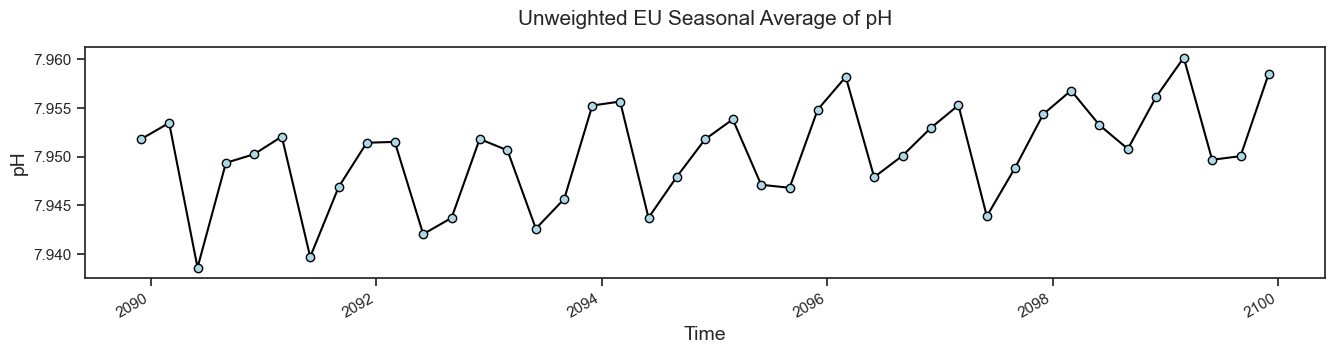

In [67]:
f, ax = plt.subplots(figsize=(16, 3))
ph_seasonal_mean.plot(marker="o",
                        color="black",
                        markerfacecolor="lightblue",
                        markeredgecolor="black")
ax.set_title("Unweighted EU Seasonal Average of pH", fontsize=15, y=1.06)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
plt.show()

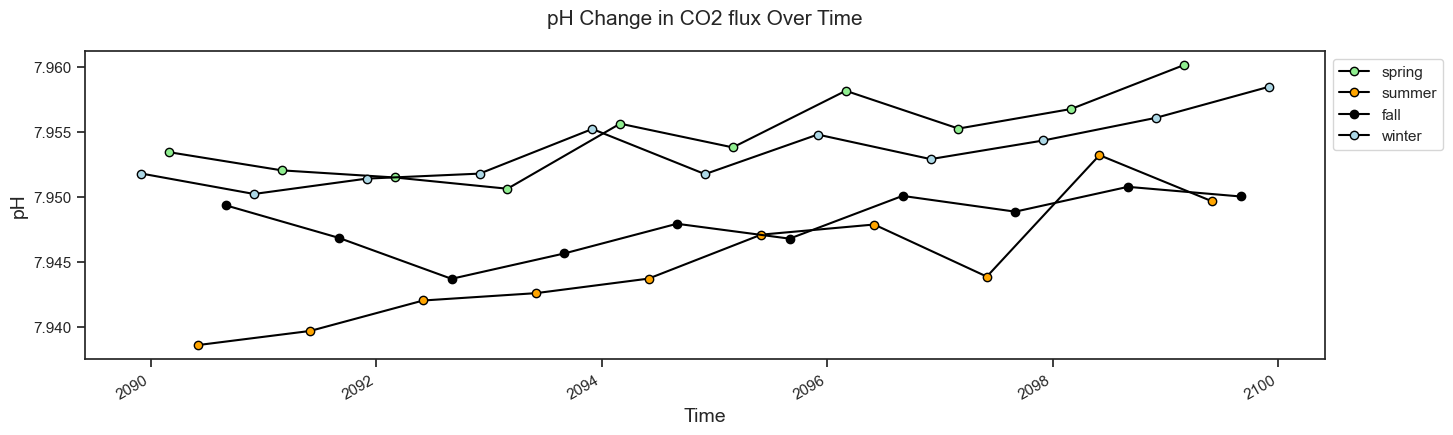

In [66]:
colors = {3: "lightgreen", 6: "orange", 9: "black", 12: "lightblue"}
seasons = {3: "spring", 6: "summer", 9: "fall", 12: "winter"}

f, ax = plt.subplots(figsize=(16, 4))
for month, arr in ph_seasonal_mean.groupby('time_counter.month'):
    arr.plot(ax=ax,
             color="black",
             marker="o",
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_title("pH Change in CO2 flux Over Time", fontsize=15, y=1.06)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
plt.show()

In [37]:
ph_months_summary = ph_flux.groupby('time_counter.month').mean('time_counter', skipna=True)
ph_months_mean_all_years = ph_flux.resample(time_counter='MS', keep_attrs=True).mean()
ph_monthly_mean = ph_months_mean_all_years.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


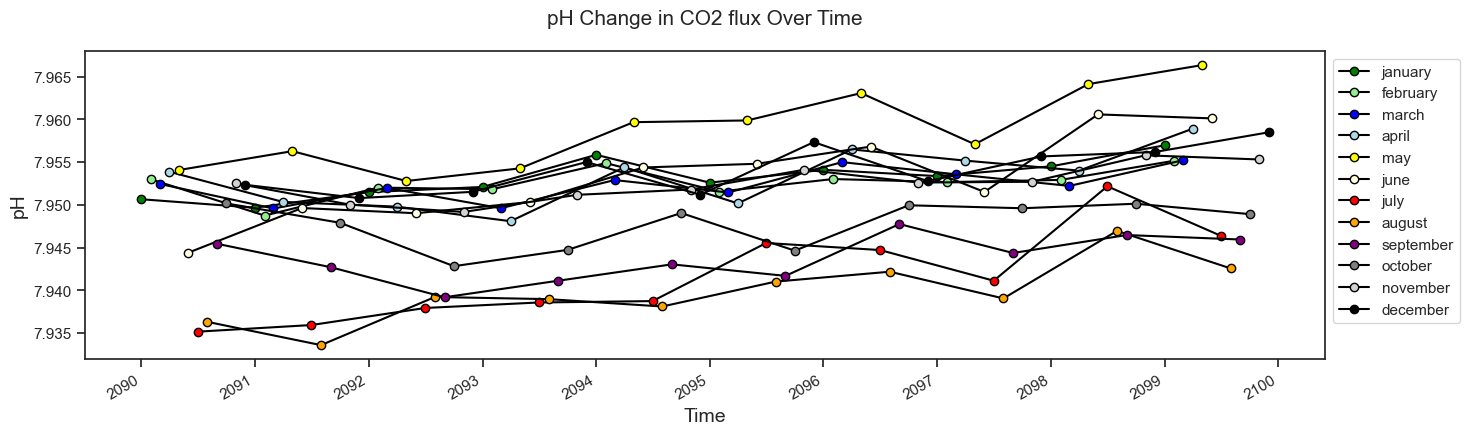

In [65]:
colors = {1: "green", 2: "lightgreen", 3: "blue", 4: "lightblue", 5: "yellow", 6: "lightyellow", 7: "red", 8: "orange", 9: "purple", 10: "grey", 11: "lightgrey", 12: "black"}
months = {1: "january", 2: "february", 3: "march", 4: "april", 5: "may", 6: "june", 7: "july", 8: "august", 9: "september", 10: "october", 11: "november", 12: "december"}

f, ax = plt.subplots(figsize=(16, 4))
for month, arr in ph_monthly_mean.groupby('time_counter.month'):
    arr.plot(ax=ax,
             color="black",
             marker="o",
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=months[month])

ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_title("pH Change in CO2 flux Over Time", fontsize=15, y=1.06)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
plt.show()

In [39]:
sliced_frame = sliced_data.sel(time_counter=slice('2090', '2100'))

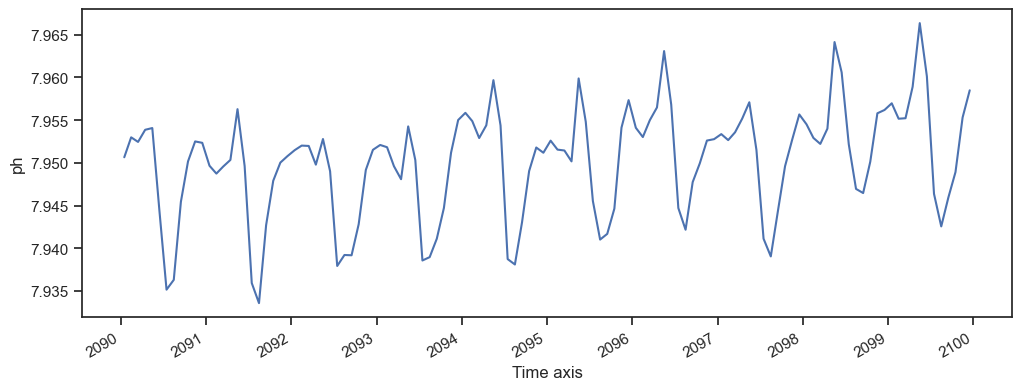

In [40]:
sliced_frame.ph.mean(dim=('y', 'x')).plot(figsize= (12, 4))

Text(0.5, 1.06, 'EU Seasonal Average of pH from 2090 to 2100')

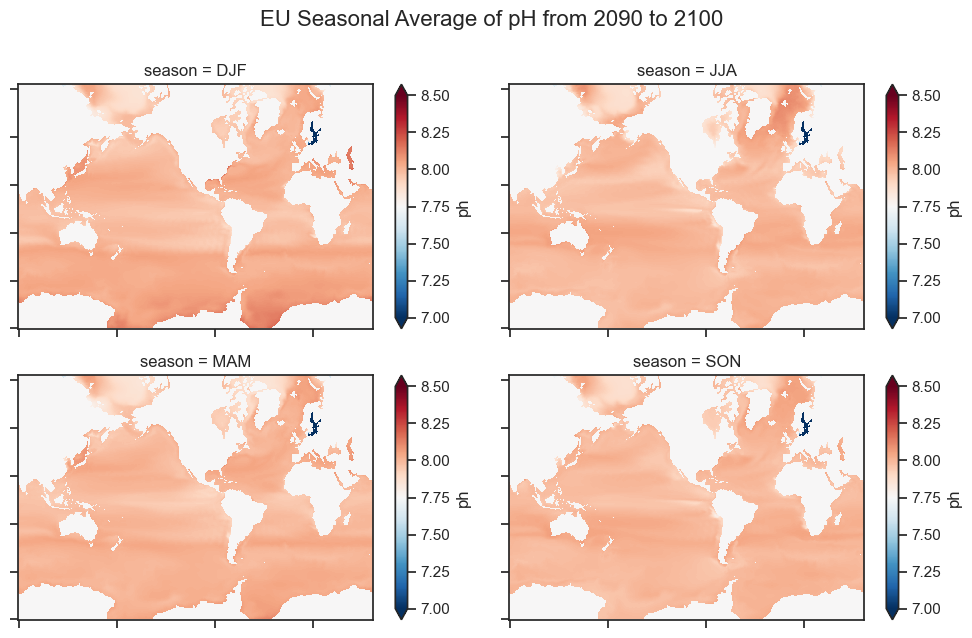

In [58]:
# regional from 2090 to 2100

ds_season_eu = sliced_frame.ph.groupby('time_counter.season').mean('time_counter')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
i = 0
for j, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        i += 1
        j = 0
        
    elif season =='SON':
        j = 1
        
    ds_season.sel(season=season).plot.pcolormesh(
        ax=axes[j, i], vmin=7, vmax=8.50, cmap='RdBu_r',
        add_colorbar=True, extend='both')
    
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')
    
for ax in axes.flat:
    ax.set(xlabel='', ylabel='')  

plt.tight_layout()
fig.suptitle('EU Seasonal Average of pH from 2090 to 2100', fontsize=15, y=1.06)

In [42]:
df_baseline = sliced_frame.to_dataframe()

In [43]:
df_baseline_overview = df_baseline.describe()

In [44]:
df_baseline_overview.to_excel('pH_baseline_2090_2100_eu.xlsx')

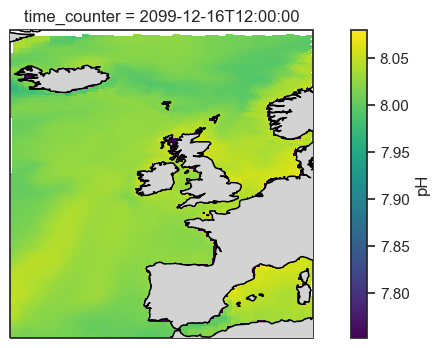

In [45]:
# visualise the data with cartopy

plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

sliced_frame.ph[119].plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=True
)
ax.coastlines()
ax.set_extent([-25, 10, 35, 70])

In [46]:
# weighted mean

month_length = ph_flux.time_counter.dt.days_in_month
ph_weighted_mean = ((ph_flux * month_length).resample(time_counter='QS-DEC').sum() / month_length.resample(time_counter='QS-DEC').sum())
ph_weighted_mean = ph_weighted_mean.where(ph_weighted_mean)
ph_weighted_season = ph_weighted_mean.groupby('time_counter').mean(["y", "x"])

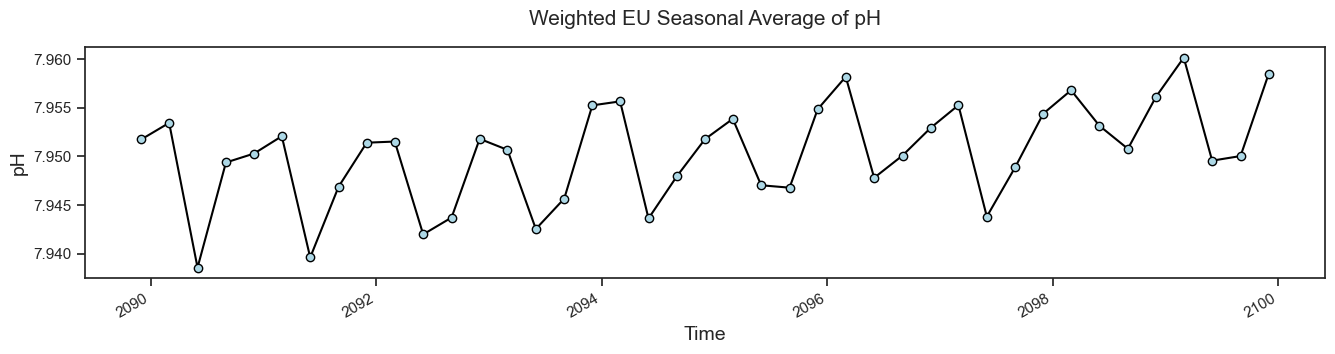

In [63]:
f, ax = plt.subplots(figsize=(16, 3))
ph_weighted_season.plot(marker="o",
                        color="black",
                        markerfacecolor="lightblue",
                        markeredgecolor="black")
ax.set_title("Weighted EU Seasonal Average of pH", fontsize=15, y=1.06)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
plt.show()

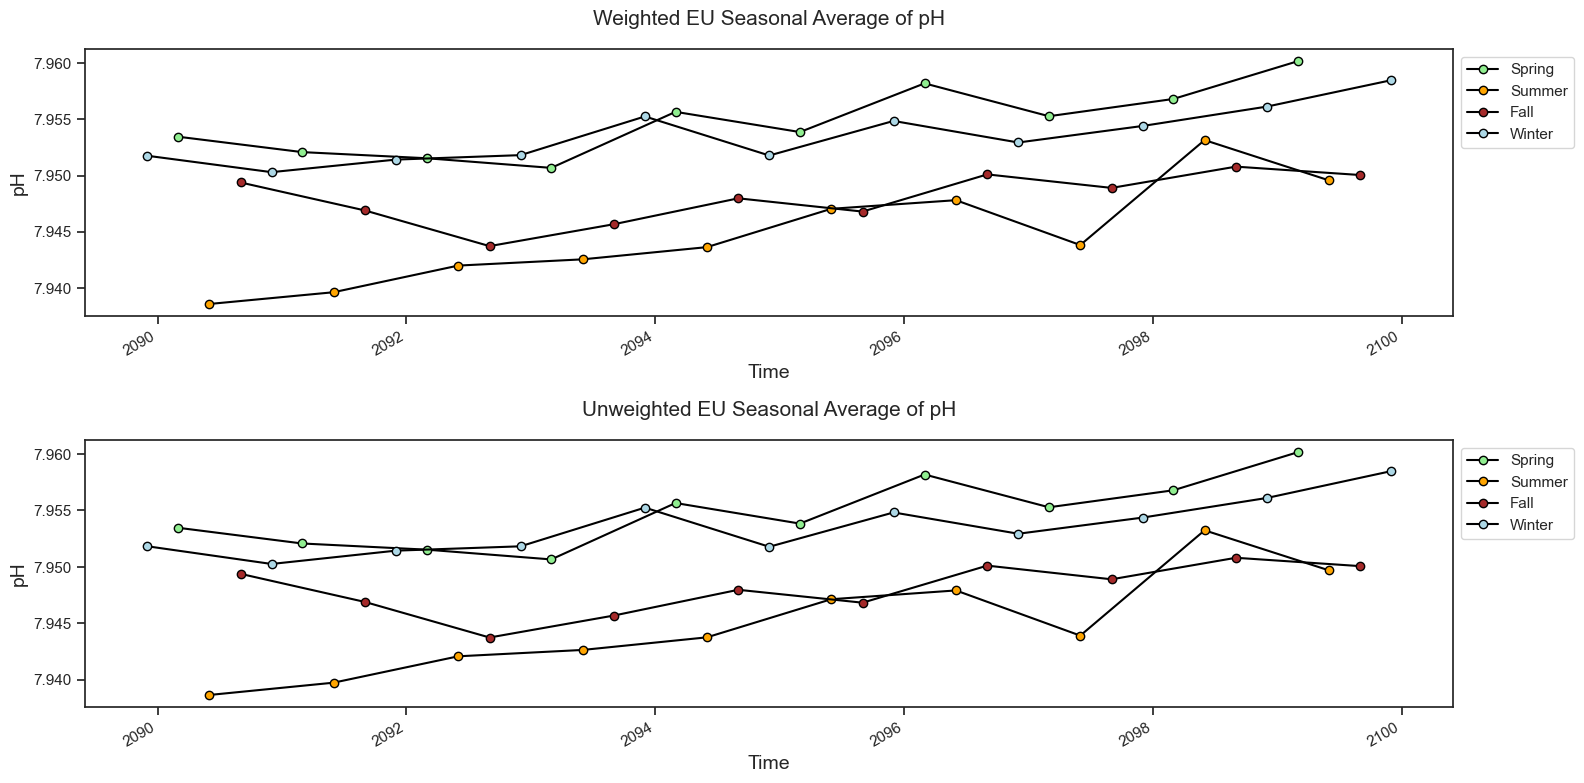

In [61]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharey=False)
for month, arr in ph_weighted_season.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black",
             marker="o",
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax1.set_title("Weighted EU Seasonal Average of pH", fontsize=15, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('pH', fontsize=14)

for month, arr in ph_seasonal_mean.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black",
             marker="o",
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax2.set_title("Unweighted EU Seasonal Average of pH", fontsize=15, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('pH', fontsize=14)
f.tight_layout()
plt.show()